In [1]:
from sklearn.cluster import KMeans
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
path = os.path.join(os.path.curdir, "../Dataset/imageLarge.png")
img = mpl.image.imread(path)
m, n, _ = img.shape
X = np.array(img).reshape((m*n, -1))

In [12]:
def initialize_centers(X, K):
    m, n = X.shape
    # choosing K out of m data points and each points can
    rand_i = np.random.choice(m, K, replace=False)
    centroids = X[rand_i, :]
    return centroids


def find_closest_centers(X, centroids):
    m = X.shape[0]
    idx = np.zeros(m, dtype=int)

    for i in range(m):
        # Euclidean distances
        errs = np.sum(np.square(centroids - X[i, :]), axis=1)
        idx[i] = np.argmin(errs)

    return idx

def compute_means(X, idx, K):
    n = X.shape[1]
    centroids = np.zeros((K, n))
    for k in range(K):
        # data points in each cluster
        x = X[idx == k]
        centroids[k, :] = np.mean(x, axis=0)

    return centroids

def kmeans(X, K, epoch=15):
    centers = initialize_centers(X, K)
    idx = None
    for j in range(epoch):
        idx = find_closest_centers(X, centers)
        centers = compute_means(X, idx, K)
        
    return centers, idx

In [4]:
centers16, idx16 = kmeans(X, 16, 10)
image16 = np.array([centers16[i] for i in idx16]).reshape((m,n,-1))

Text(0.5, 1.0, '16 colors image')

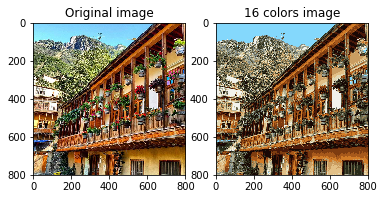

In [5]:
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(image16)
plt.title("16 colors image")

In [13]:
centers256, idx256 = kmeans(X, 256, 5)
image256 = np.array([centers256[i] for i in idx256]).reshape((m,n,-1))

Text(0.5, 1.0, '256 colors image')

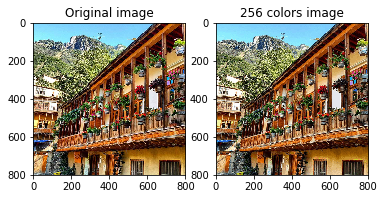

In [14]:
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(image256)
plt.title("256 colors image")